In [1]:
# Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import lightgbm as lgb
from xgboost import XGBClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Step 2: Load the Titanic Dataset
train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

In [7]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Step 3: Exploratory Data Analysis (EDA)
print("Dataset Overview:")
print(train_data.head())

Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [4]:
print("\nMissing Values:")
print(train_data.isnull().sum())


Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


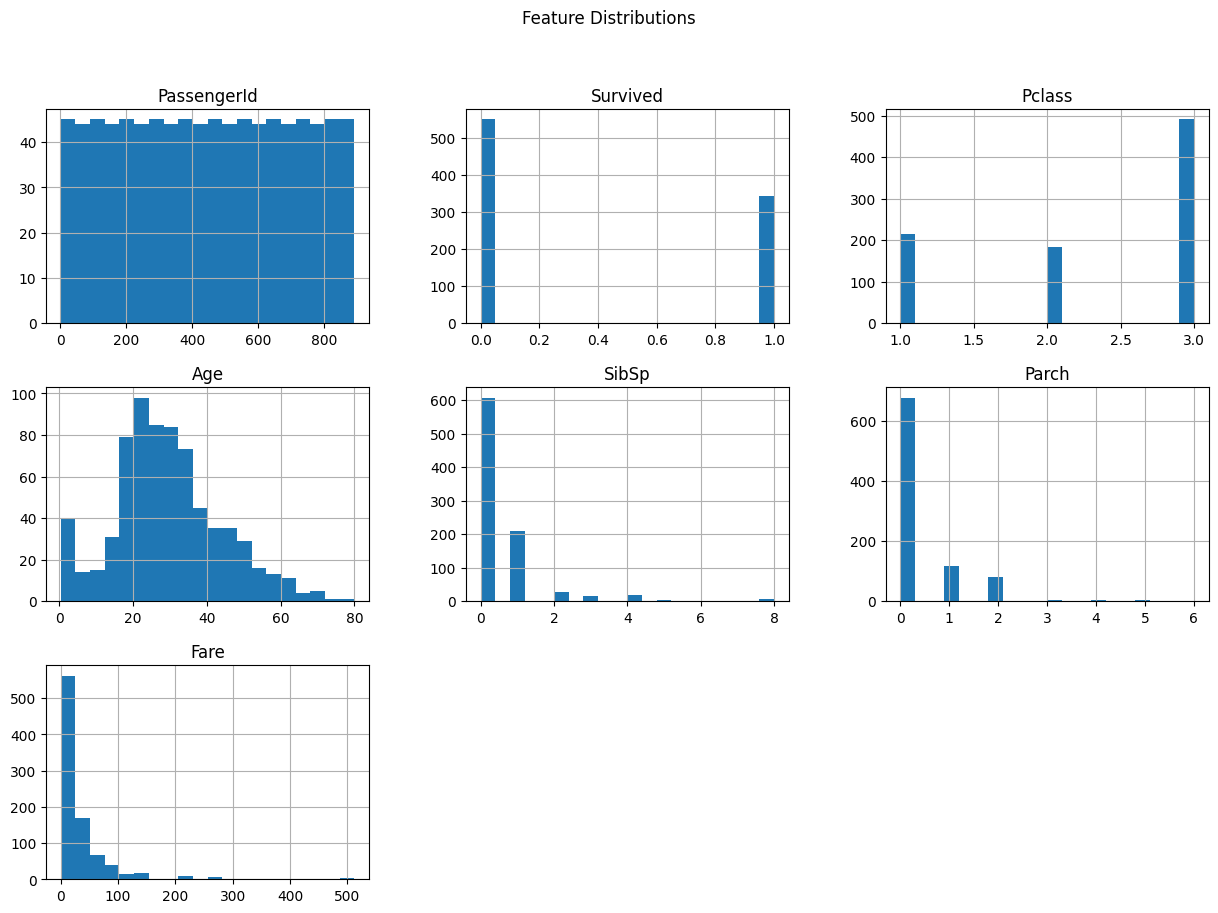

In [5]:
# Visualize Data Distributions
train_data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

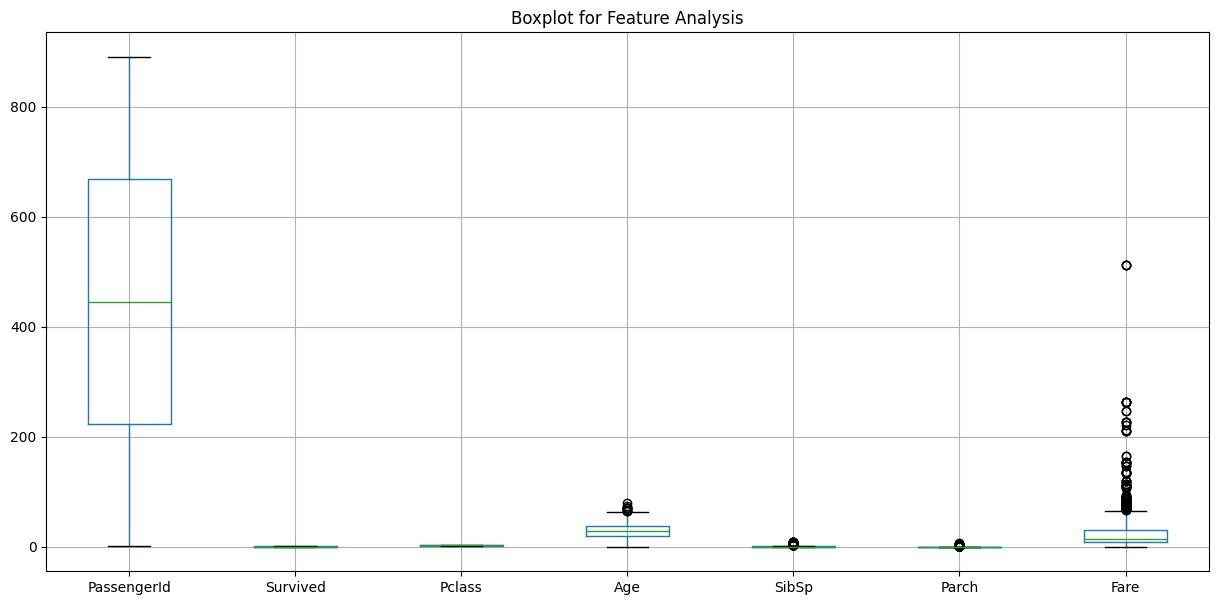

In [6]:
# Boxplot of Numeric Features
train_data.boxplot(figsize=(15, 7))
plt.title("Boxplot for Feature Analysis")
plt.show()


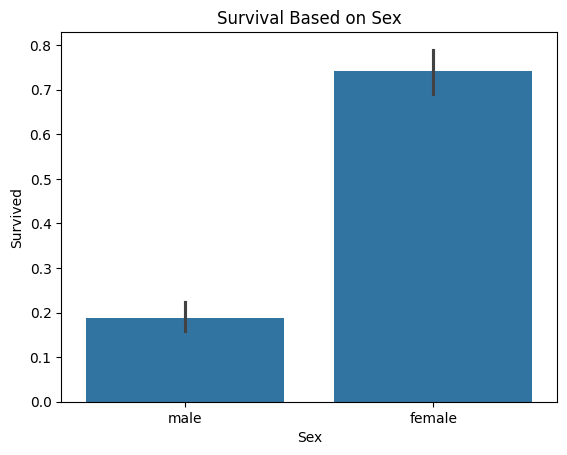

In [9]:
# Relationship Between Features and Survival
sns.barplot(data=train_data, x='Sex', y='Survived')
plt.title("Survival Based on Sex")
plt.show()

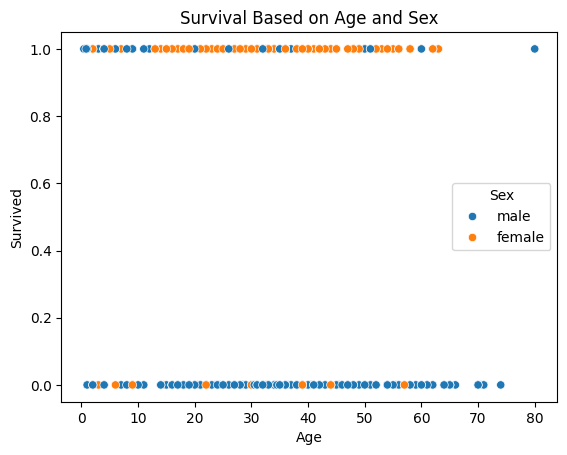

In [11]:
sns.scatterplot(data=train_data, x='Age', y='Survived', hue='Sex')
plt.title("Survival Based on Age and Sex")
plt.show()

In [12]:
# Step 4: Data Preprocessing
# Impute Missing Values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

<ipython-input-12-5c604e111a8c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-12-5c604e111a8c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [13]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


<ipython-input-13-6eacbbf88dd2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
<ipython-input-13-6eacbbf88dd2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [14]:
# Encode Categorical Variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)


In [15]:
# Drop Unnecessary Columns
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
# Separate Features and Target Variable
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']


In [17]:
# Step 5: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Step 6: Build Predictive Models
# LightGBM Model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [19]:
# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:22:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
# Step 7: Evaluation Metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print(classification_report(y_true, y_pred))

evaluate_model(y_val, lgb_preds, "LightGBM")
evaluate_model(y_val, xgb_preds, "XGBoost")

Performance Metrics for LightGBM:
Accuracy: 0.83
Precision: 0.79
Recall: 0.78
F1 Score: 0.79
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Performance Metrics for XGBoost:
Accuracy: 0.82
Precision: 0.80
Recall: 0.76
F1 Score: 0.78
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [23]:
pip install --upgrade scikit-learn xgboost lightgbm


In [25]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


In [27]:
#LightGBM Manual Hyperparameter Tuning
best_params = None
best_score = 0

for num_leaves in [31, 50]:
    for learning_rate in [0.01, 0.1]:
        for n_estimators in [100, 200]:
            lgb_model = lgb.LGBMClassifier(num_leaves=num_leaves, learning_rate=learning_rate, n_estimators=n_estimators)
            lgb_model.fit(X_train, y_train)
            preds = lgb_model.predict(X_val)
            score = accuracy_score(y_val, preds)
            if score > best_score:
                best_score = score
                best_params = (num_leaves, learning_rate, n_estimators)

print("Best Parameters for LightGBM:", best_params, "with Accuracy:", best_score)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [29]:
#XGBoost Manual Hyperparameter Tuning
best_params = None
best_score = 0

for learning_rate in [0.01, 0.1]:
    for n_estimators in [100, 200]:
        for max_depth in [3, 5]:
            xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss',
                                      learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
            xgb_model.fit(X_train, y_train)
            preds = xgb_model.predict(X_val)
            score = accuracy_score(y_val, preds)
            if score > best_score:
                best_score = score
                best_params = (learning_rate, n_estimators, max_depth)

print("Best Parameters for XGBoost:", best_params, "with Accuracy:", best_score)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Parameters for XGBoost: (0.1, 200, 3) with Accuracy: 0.8435754189944135


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [31]:
# Step 9: Comparative Analysis
metrics = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [accuracy_score(y_val, lgb_preds), accuracy_score(y_val, xgb_preds)],
    "Precision": [precision_score(y_val, lgb_preds), precision_score(y_val, xgb_preds)],
    "Recall": [recall_score(y_val, lgb_preds), recall_score(y_val, xgb_preds)],
    "F1 Score": [f1_score(y_val, lgb_preds), f1_score(y_val, xgb_preds)]
}

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)
print("\nComparative Analysis:\n", metrics_df)


Comparative Analysis:
           Accuracy  Precision    Recall  F1 Score
Model                                            
LightGBM  0.826816   0.794521  0.783784  0.789116
XGBoost   0.821229   0.800000  0.756757  0.777778


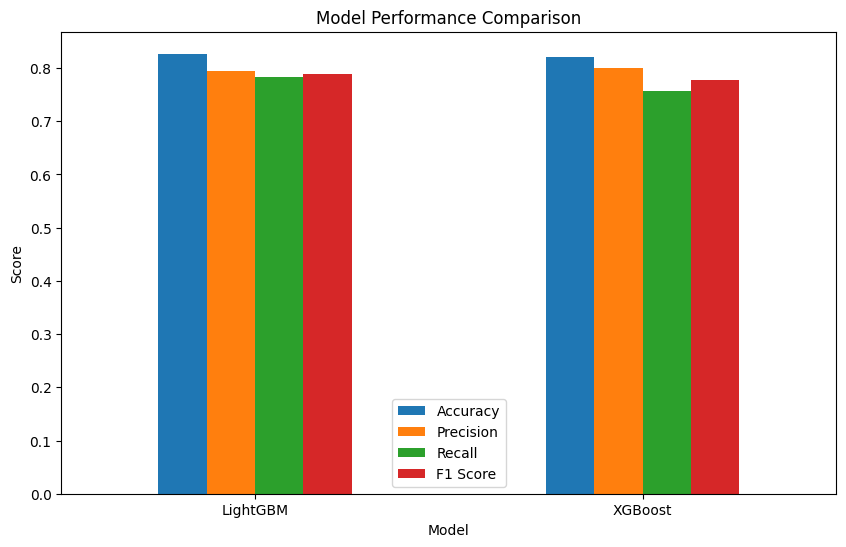

In [32]:
# Visualization of Metrics
metrics_df.plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

EDA Findings:

Missing values imputed for Age, Fare, and Embarked.
Survival is highly influenced by Sex and Age.

Performance Comparison:

LightGBM and XGBoost models trained on the Titanic dataset showed competitive results.
After hyperparameter tuning, both models can be further optimized for higher accuracy.